<a href="https://colab.research.google.com/github/iPrinka/MITx-Micromasters-Statistics-Data-Science/blob/main/one_league_social_w3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Data Analysis for Social Science

**OBJECTIVES**

- Load and explore data with R and the `tidyverse` package
- Develop an intuition for probability distributions and their relationship to integrals
- Build basic regression models using R

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
df <- read_csv('health.csv')

New names:
• `` -> `...1`
Rows: 1207 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sex, smoker, region
dbl (5): ...1, age, bmi, children, charges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
head(df)

...1,age,sex,bmi,children,smoker,region,charges
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,18,male,33.770,1,no,southeast,1725.552
2,28,NA,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
5,31,female,NA,0,no,southeast,3756.622
6,46,female,33.440,1,no,southeast,8240.590
7,37,female,27.740,3,no,northwest,7281.506


In [7]:
str(df)

spc_tbl_ [1,207 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1    : num [1:1207] 1 2 3 5 6 7 8 9 10 11 ...
 $ age     : num [1:1207] 18 28 33 31 46 37 37 60 25 62 ...
 $ sex     : chr [1:1207] "male" NA "male" "female" ...
 $ bmi     : num [1:1207] 33.8 33 22.7 NA 33.4 ...
 $ children: num [1:1207] 1 3 0 0 1 3 2 0 0 0 ...
 $ smoker  : chr [1:1207] "no" "no" "no" "no" ...
 $ region  : chr [1:1207] "southeast" "southeast" "northwest" "southeast" ...
 $ charges : num [1:1207] 1726 4449 21984 3757 8241 ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  ..   age = col_double(),
  ..   sex = col_character(),
  ..   bmi = col_double(),
  ..   children = col_double(),
  ..   smoker = col_character(),
  ..   region = col_character(),
  ..   charges = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


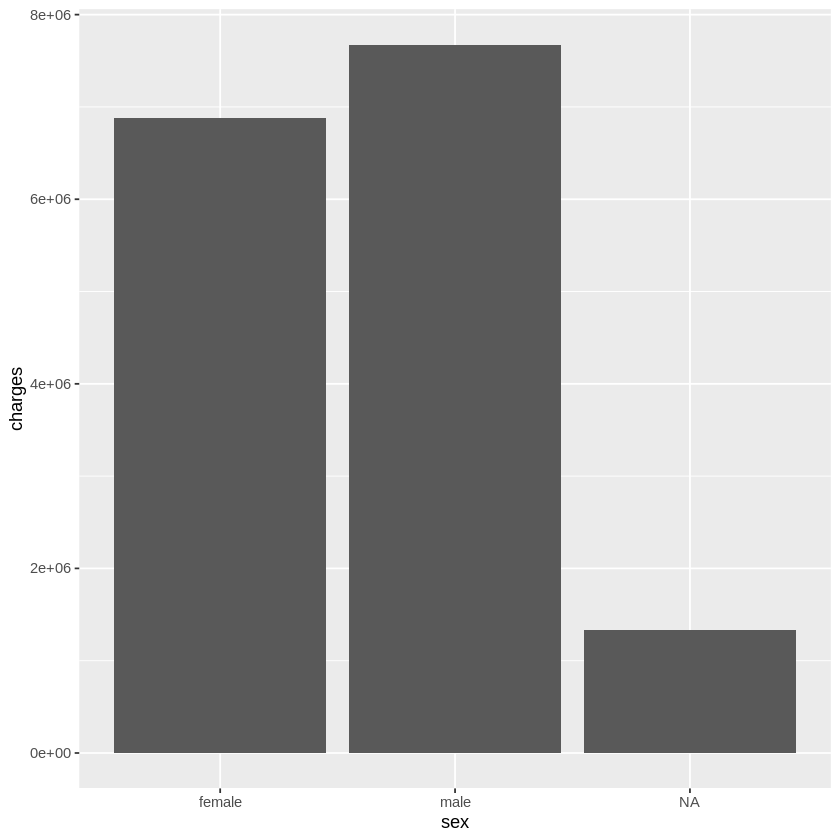

In [35]:
ggplot(df, aes(x=sex, y=charges)) + geom_col()

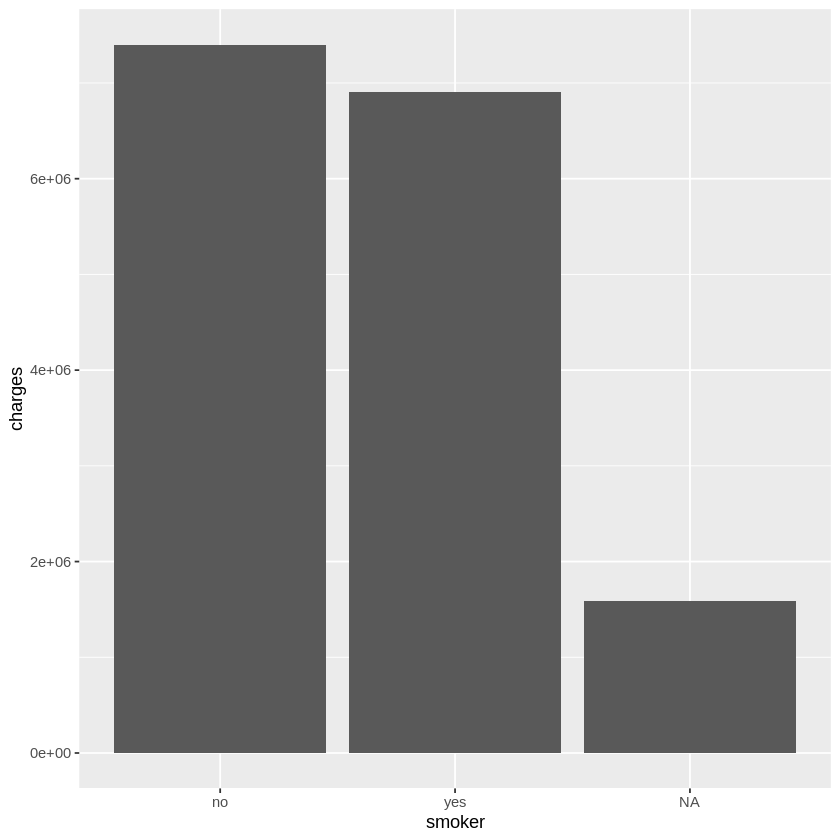

In [12]:
ggplot(df, aes(x=smoker, y=charges)) + geom_col()

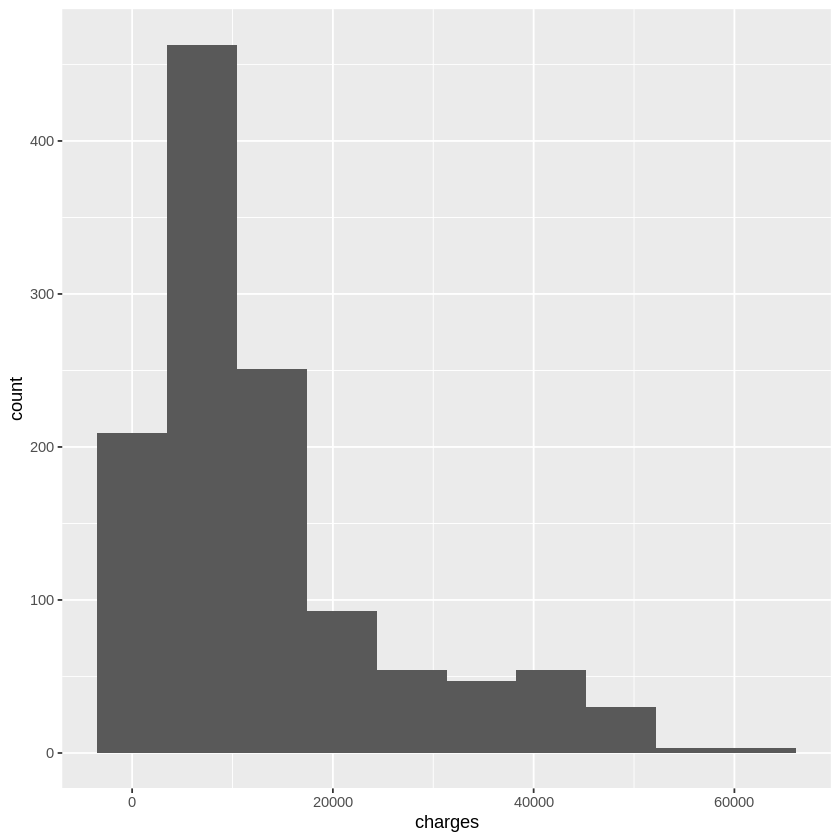

In [14]:
ggplot(df, aes(charges)) + geom_histogram(bins=10)

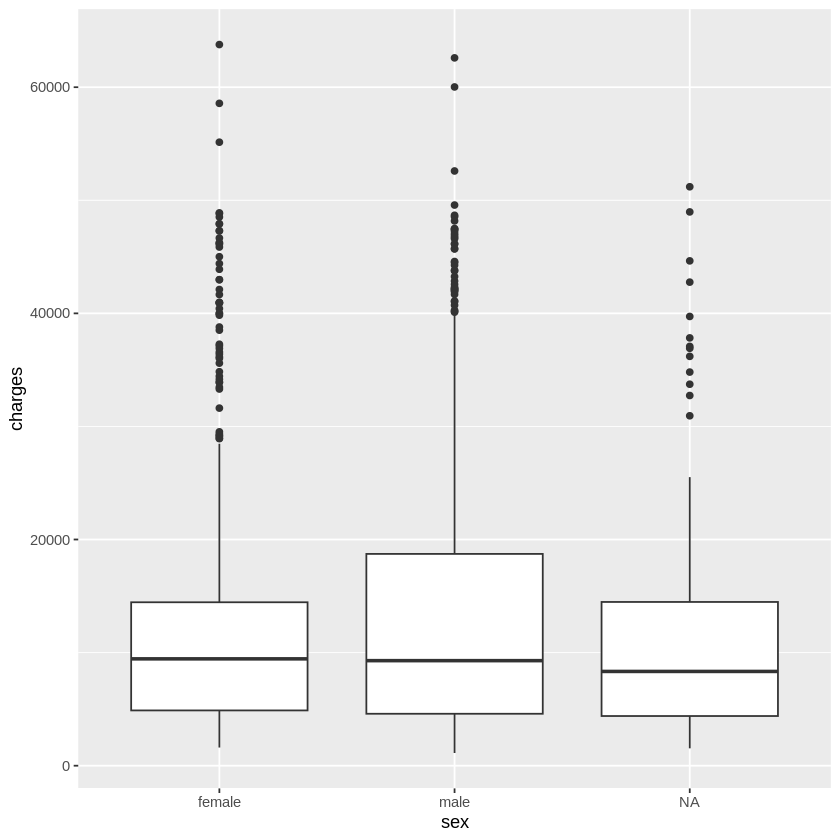

In [20]:
ggplot(df, aes(x=sex, y=charges)) + geom_boxplot()

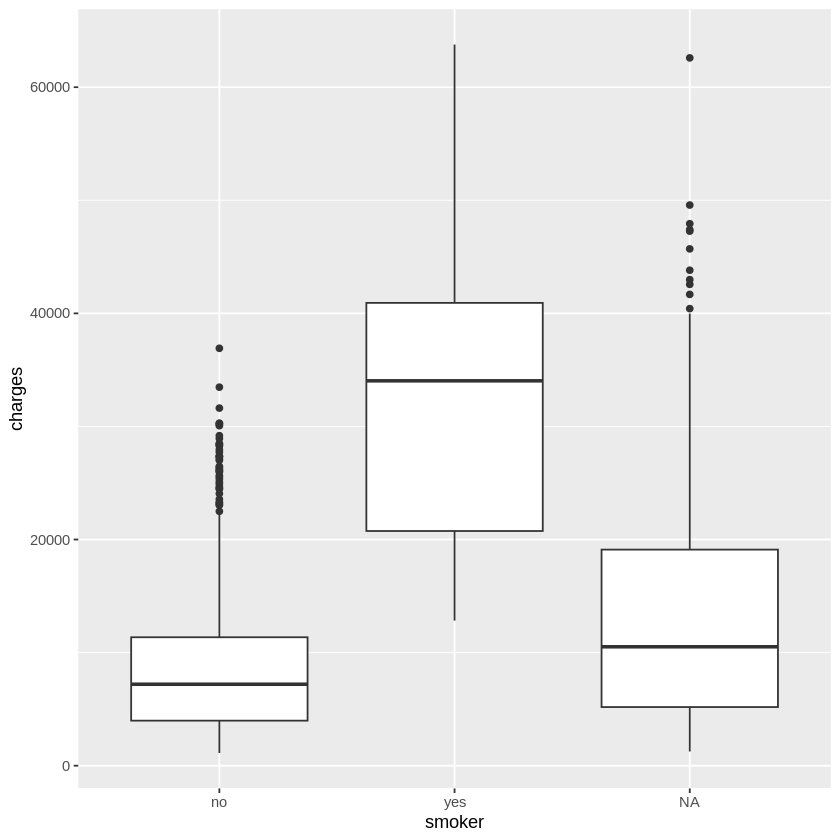

In [21]:
ggplot(df, aes(x=smoker, y=charges)) + geom_boxplot()

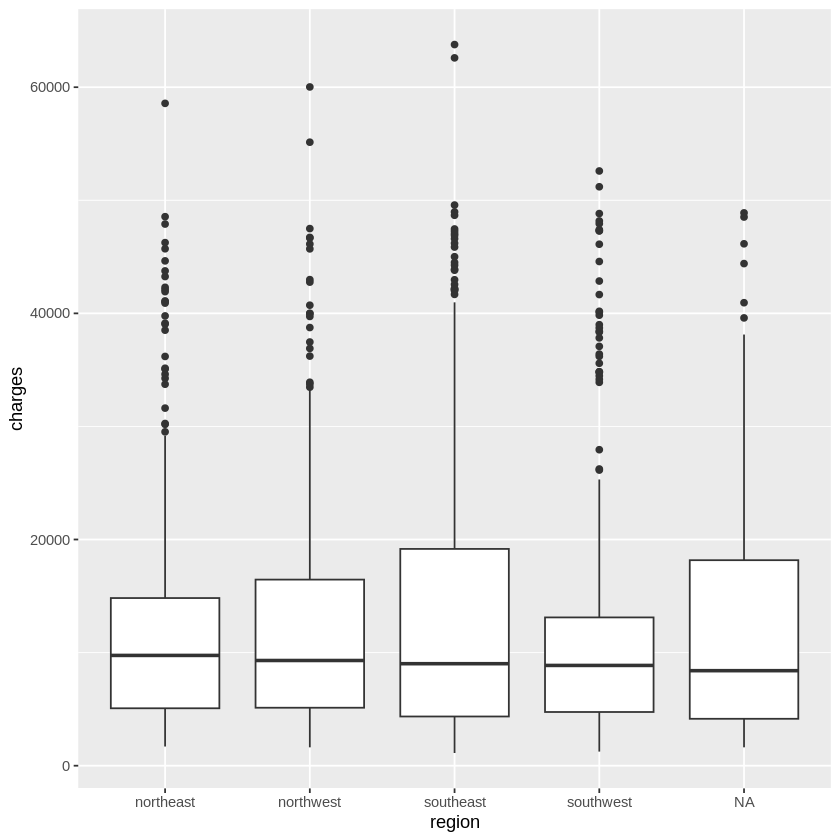

In [22]:
ggplot(df, aes(x=region, y=charges)) + geom_boxplot()

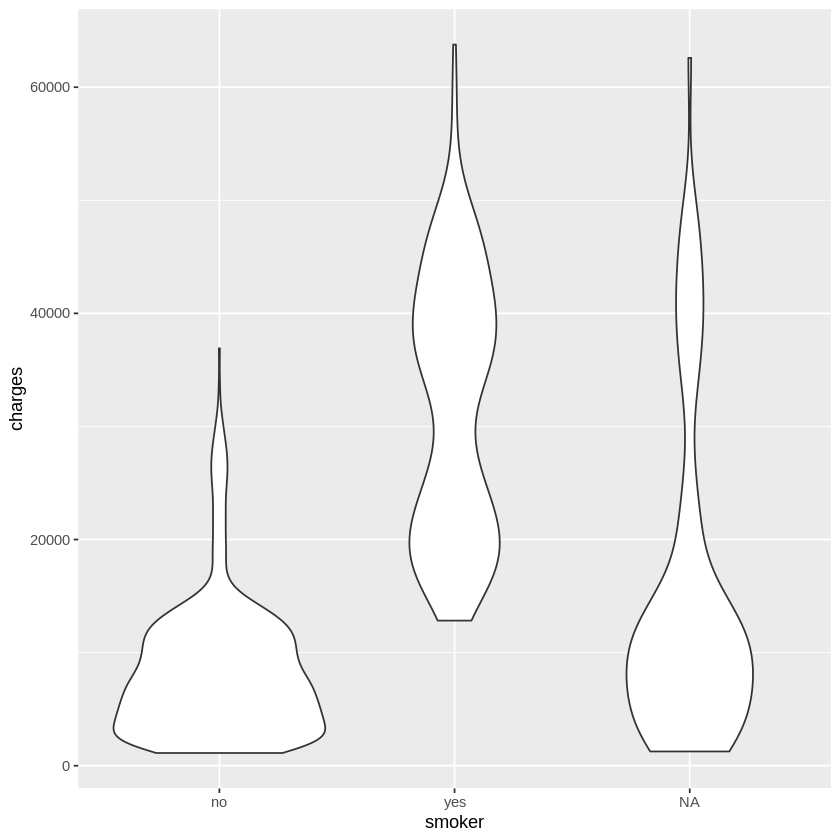

In [25]:
ggplot(df, aes(x=smoker, y=charges)) + geom_violin()

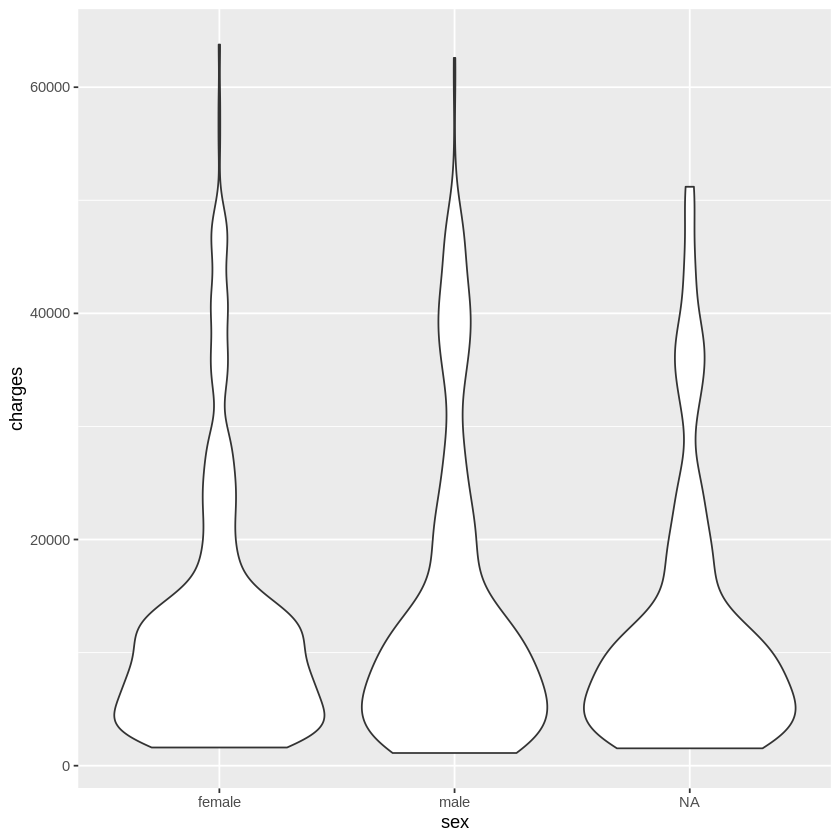

In [26]:
ggplot(df, aes(x=sex, y=charges)) + geom_violin()

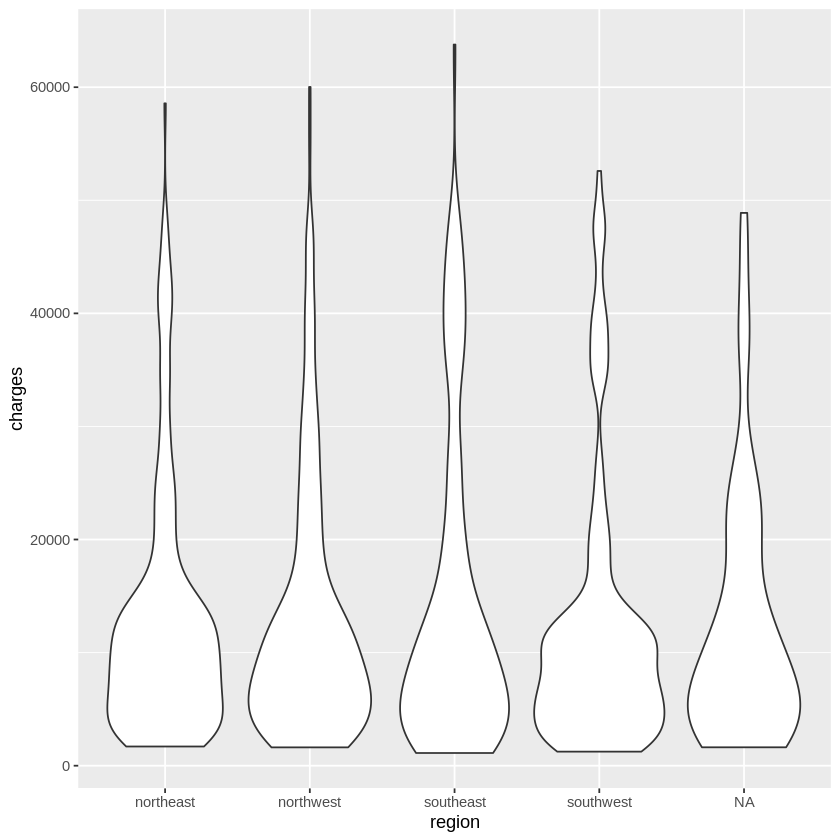

In [27]:
ggplot(df, aes(x=region, y=charges)) + geom_violin()

Warning message:
“Removed 117 rows containing missing values (`geom_point()`).”


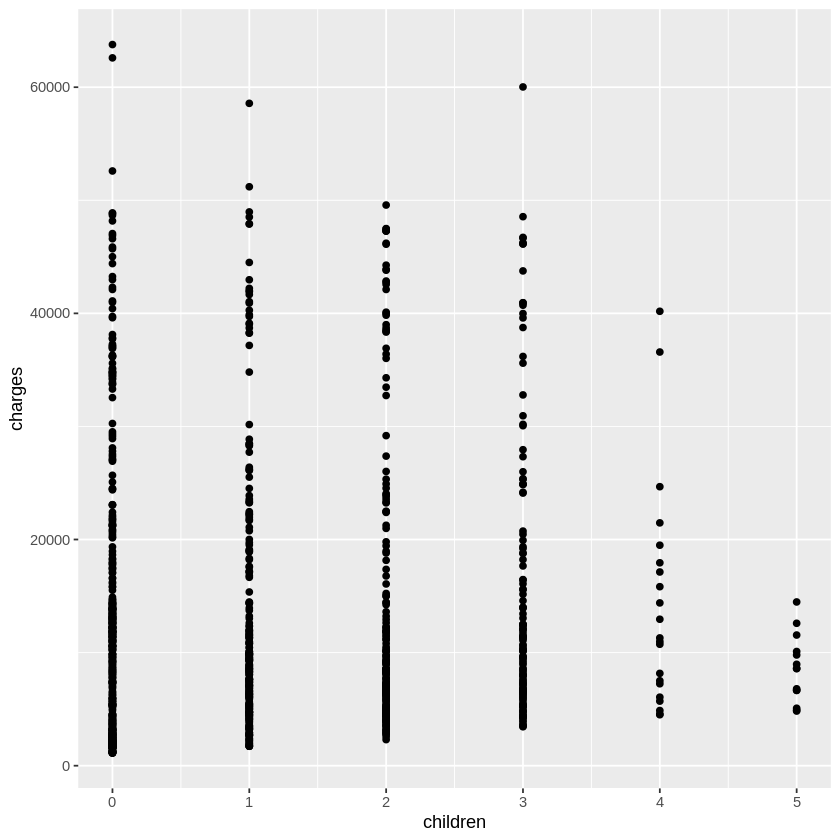

In [28]:
ggplot(df, aes(x=children, y=charges)) + geom_point()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 105 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 105 rows containing missing values (`geom_point()`).”


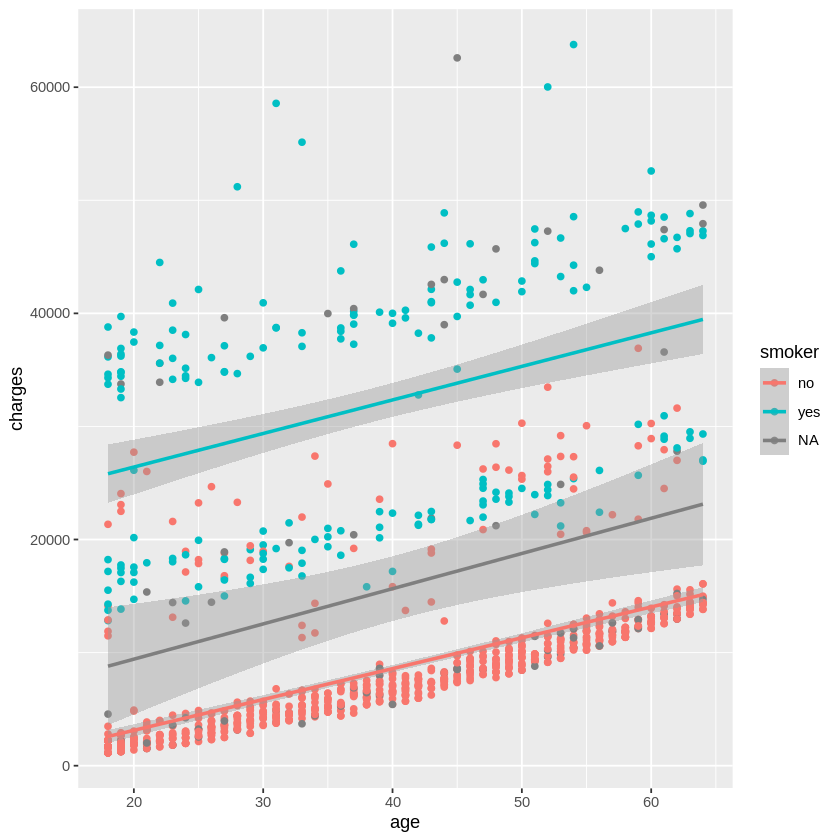

In [33]:
ggplot(df, aes(x = age, y = charges, color = smoker)) +
  geom_point()  + geom_smooth(method='lm')

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 105 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 105 rows containing missing values (`geom_point()`).”


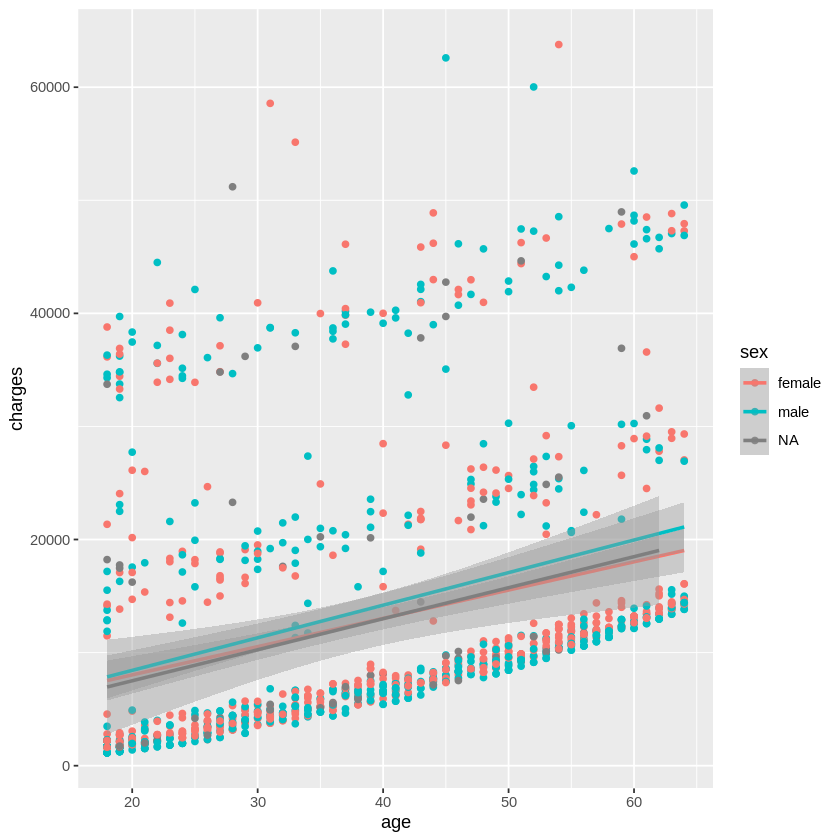

In [32]:
ggplot(df, aes(x = age, y = charges, color = sex)) +
  geom_point() + geom_smooth(method='lm')

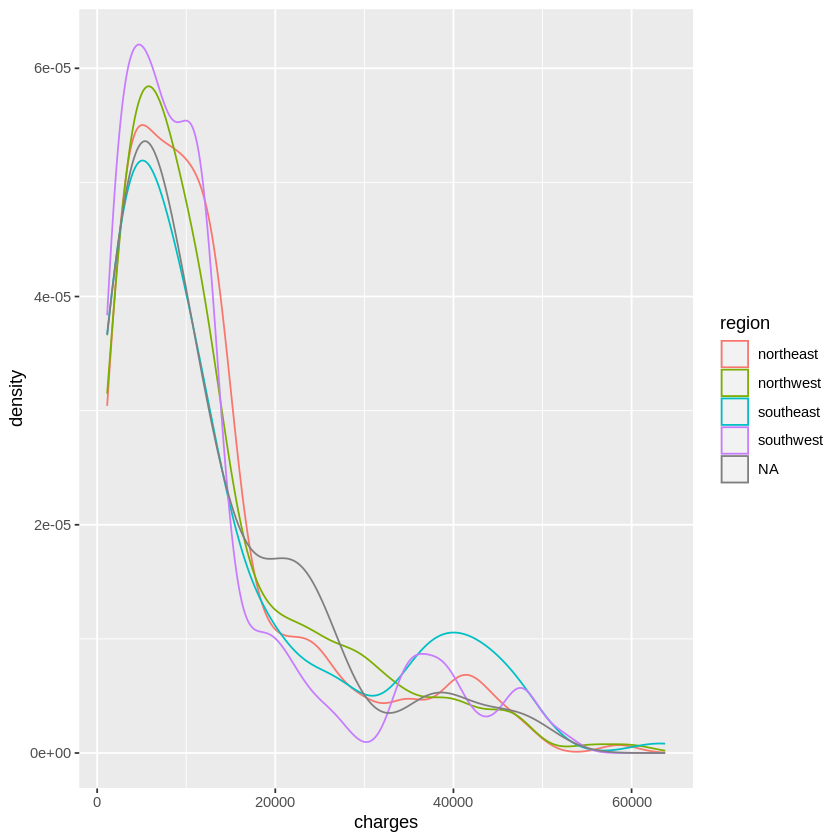

In [34]:
ggplot(df, aes(x=charges, color=region)) + geom_density()

Warning message:
“Removed 117 rows containing missing values (`position_stack()`).”


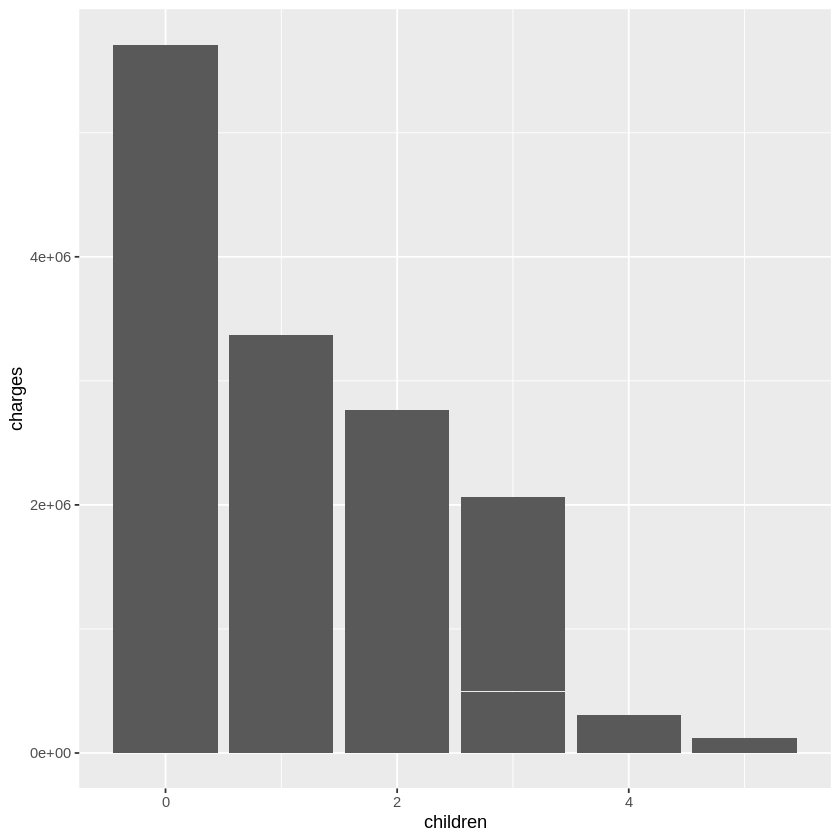

In [41]:
mean(df$bmi, na.rm=TRUE)

[1] 30.74263

In [42]:
df %>%
  group_by(region) %>%
  summarise(mean(bmi, na.rm = TRUE))

region,"mean(bmi, na.rm = TRUE)"
<chr>,<dbl>
northeast,29.10958
northwest,29.45477
southeast,33.55677
southwest,30.78809
NA,30.53133


In [43]:
df %>%
  group_by(sex) %>%
  summarise(mean(bmi, na.rm = TRUE))

sex,"mean(bmi, na.rm = TRUE)"
<chr>,<dbl>
female,30.56302
male,31.15036
NA,29.62471


In [44]:
df %>%
  group_by(smoker) %>%
  summarise(mean(bmi, na.rm = TRUE))

smoker,"mean(bmi, na.rm = TRUE)"
<chr>,<dbl>
no,30.79021
yes,30.49174
NA,30.86468


#### Data set from class

Read in and subset data to `Indicator.Code == "SP.ADO.TFRT"`.

In [48]:
hwdata <- read.csv('Gender_StatsData.csv')

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”


### Probability Integrals

- Binomial Distribution
- Normal Distribution



- Flip 4 coins -- outcomes?

In [49]:
f <- function(x){-x^2 + 1}

In [50]:
f(3)

[1] -8

In [51]:
integrate(f, lower=-1, upper=1)

1.333333 with absolute error < 1.5e-14

### Regression Models in R

In [ ]:
#lm(y-x)

In [54]:
df <- read_csv('health.csv')

New names:
• `` -> `...1`
Rows: 1207 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sex, smoker, region
dbl (5): ...1, age, bmi, children, charges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [55]:
smokers = df %>%
              filter(smoker == 'yes')
head(smokers)

...1,age,sex,bmi,children,smoker,region,charges
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
29,31,male,36.30,2,yes,southwest,38711.00
34,28,NA,36.40,1,yes,southwest,51194.56
38,NA,male,36.67,NA,yes,northeast,39774.28
39,60,male,39.90,0,yes,southwest,48173.36
49,36,male,35.20,1,yes,southeast,38709.18
52,48,NA,28.00,1,yes,southwest,23568.27


In [57]:
model <- lm(charges ~ age, data = smokers)

In [58]:
summary(model)


Call:
lm(formula = charges ~ age, data = smokers)

Residuals:
   Min     1Q Median     3Q    Max 
-15931 -10781   5815   8570  28896 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20477.51    2158.05   9.489  < 2e-16 ***
age           296.69      52.76   5.623 6.22e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10780 on 201 degrees of freedom
  (15 observations deleted due to missingness)
Multiple R-squared:  0.1359,	Adjusted R-squared:  0.1316 
F-statistic: 31.62 on 1 and 201 DF,  p-value: 6.217e-08


In [59]:
confint(model)

,2.5 %,97.5 %
(Intercept),16222.1837,24732.8265
age,192.6494,400.7214


In [60]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,3675549565,3675549565,31.62035,6.216895e-08
Residuals,201,23364243071,116240015,NA,NA


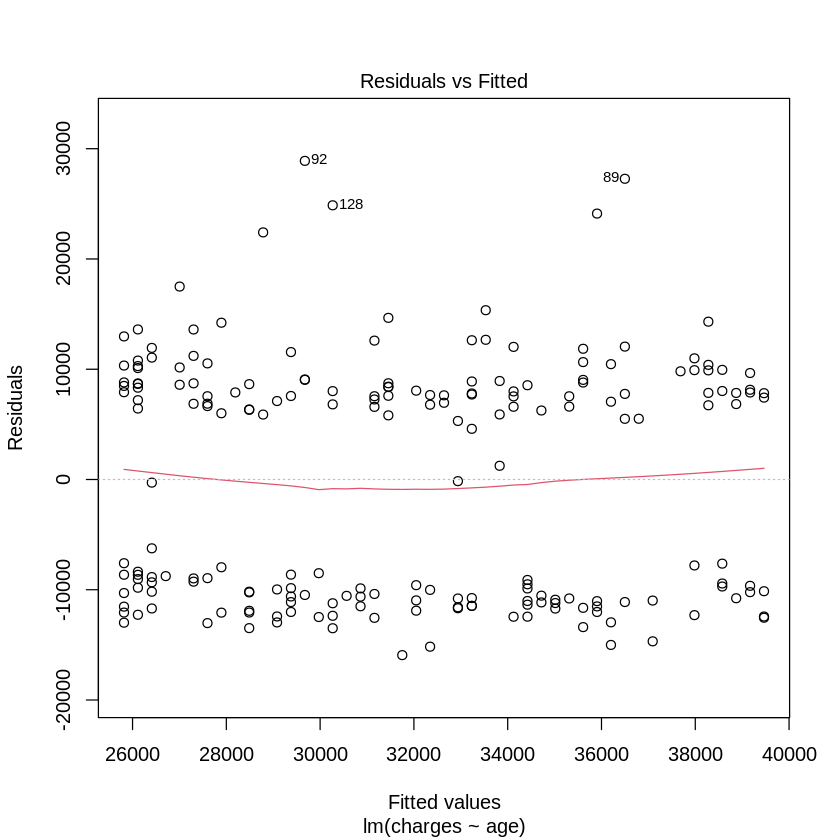

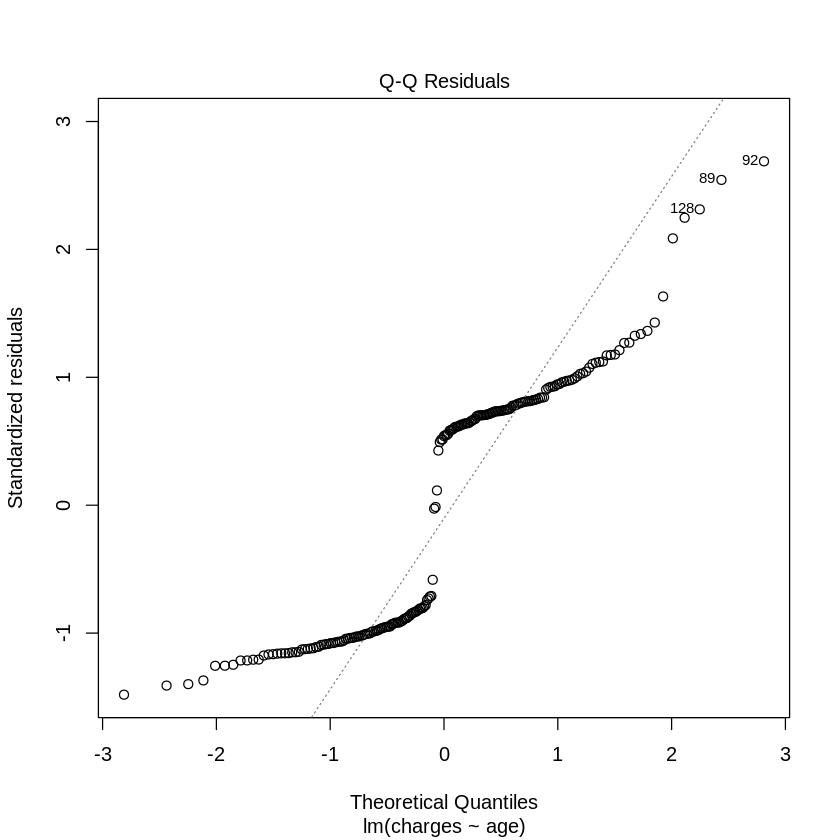

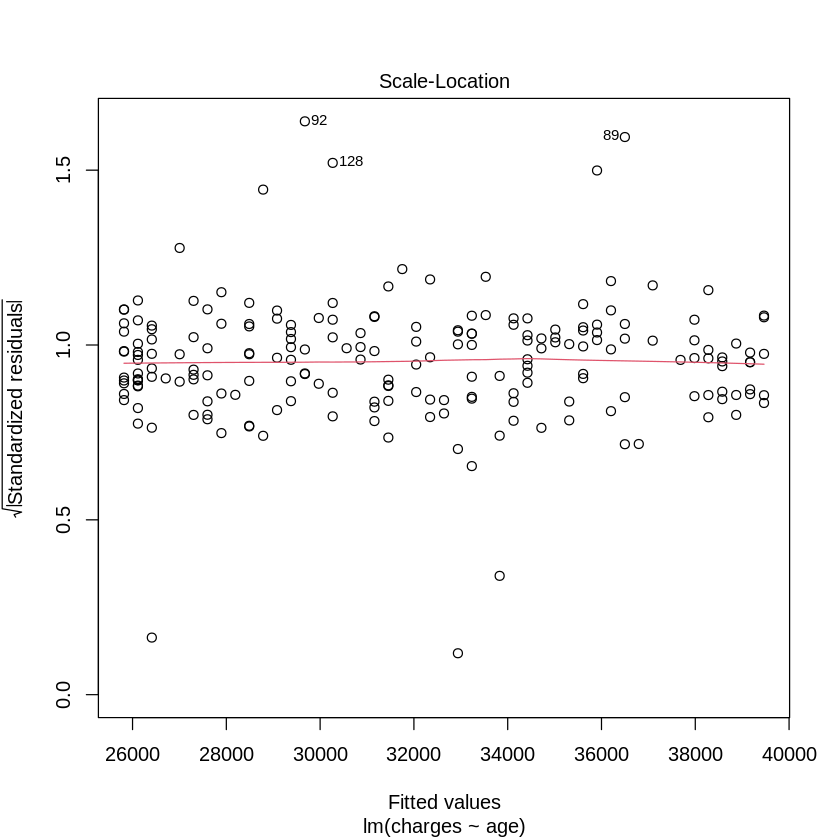

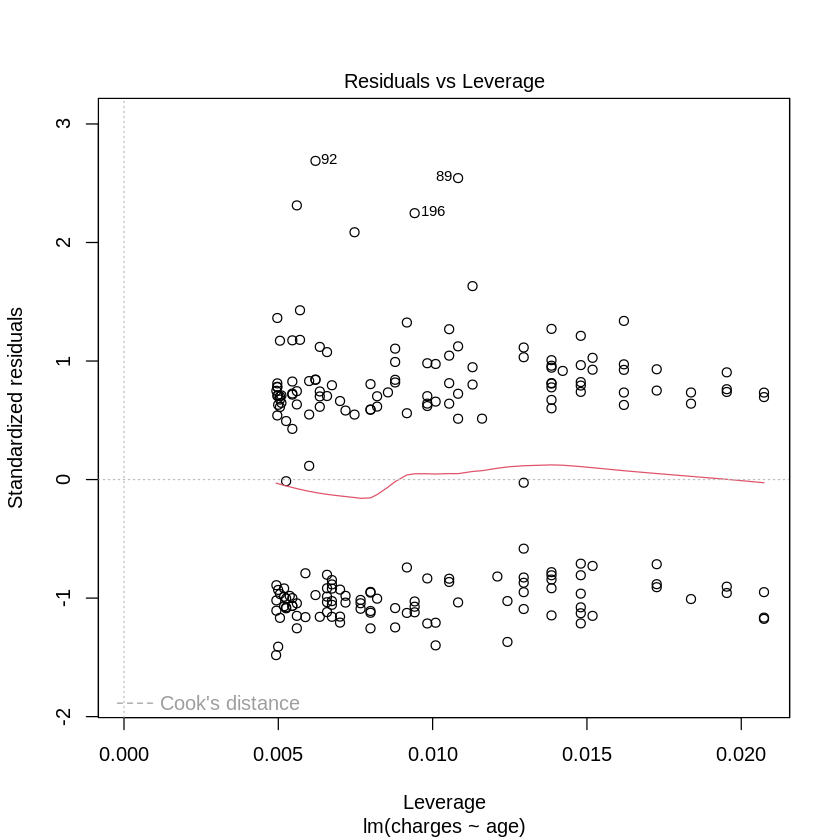

In [61]:
plot(model)

In [66]:
model2 <- lm(charges ~ age + bmi, data = smokers)

In [63]:
model2


Call:
lm(formula = charges ~ age + bmi, data = smokers)

Coefficients:
(Intercept)          age          bmi  
   -23984.5        263.5       1483.6  


In [64]:
summary(model2)


Call:
lm(formula = charges ~ age + bmi, data = smokers)

Residuals:
     Min       1Q   Median       3Q      Max 
-15318.7  -4371.6    164.4   3547.3  19143.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -23984.50    2305.21 -10.404  < 2e-16 ***
age            263.46      29.75   8.856  7.8e-16 ***
bmi           1483.61      66.69  22.248  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5630 on 180 degrees of freedom
  (35 observations deleted due to missingness)
Multiple R-squared:  0.7695,	Adjusted R-squared:  0.767 
F-statistic: 300.5 on 2 and 180 DF,  p-value: < 2.2e-16


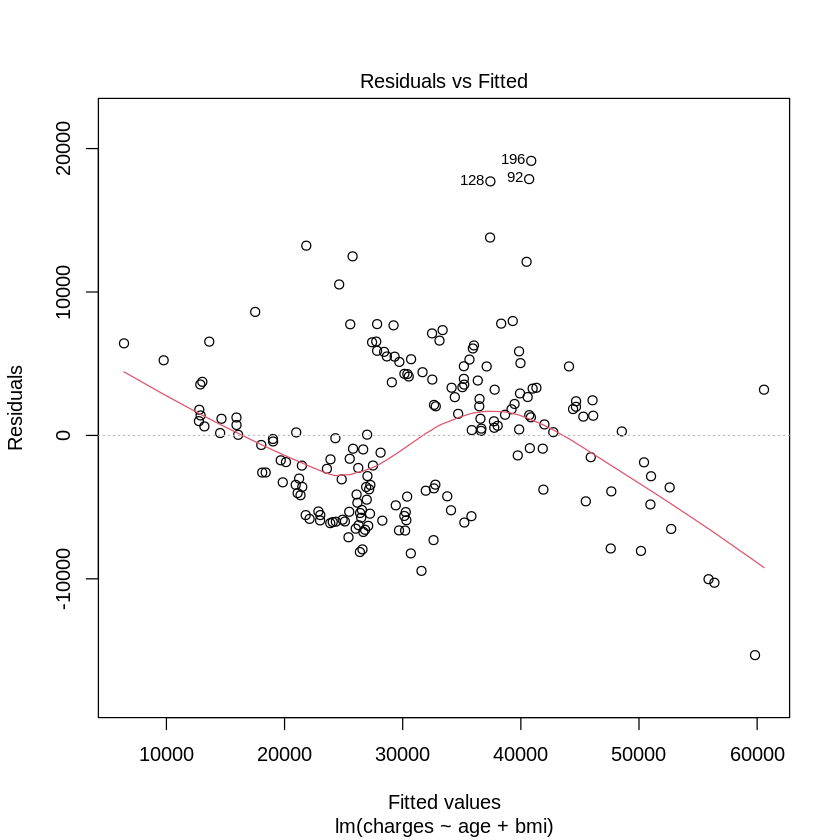

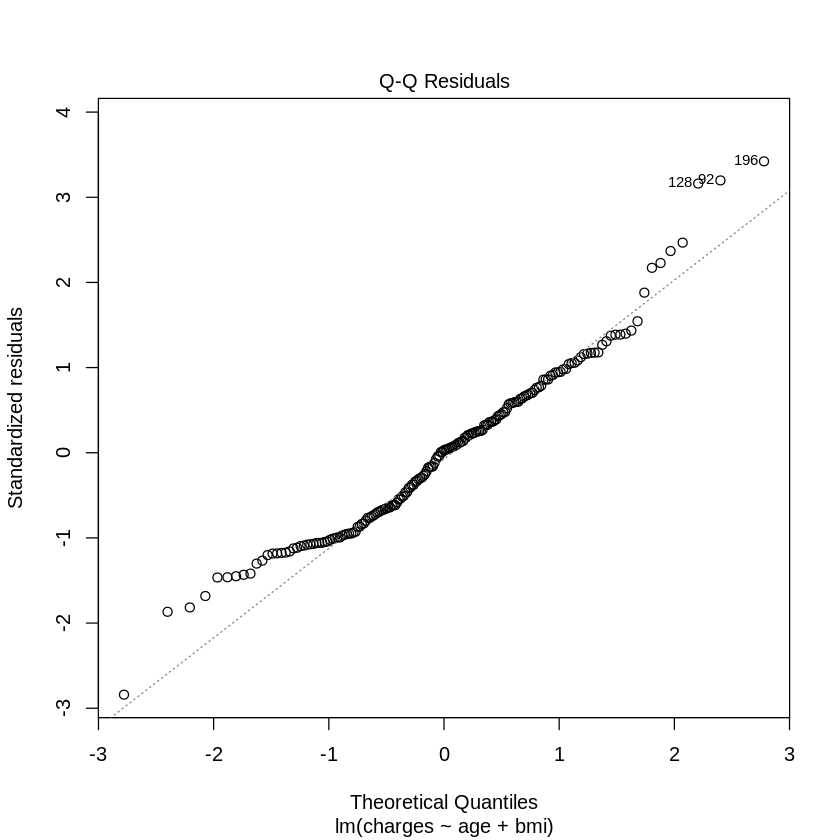

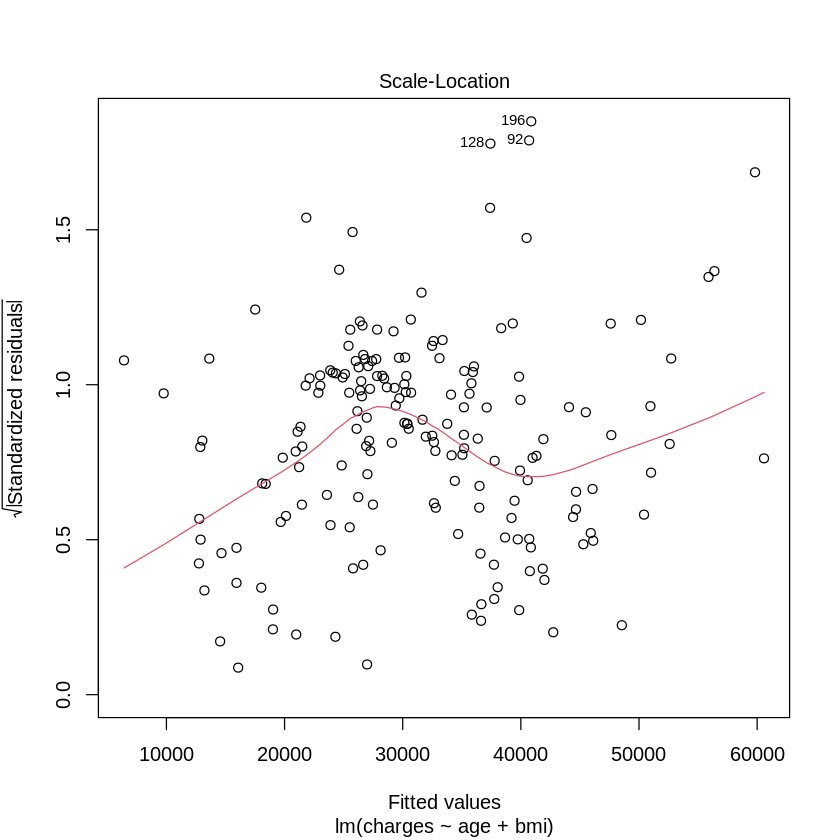

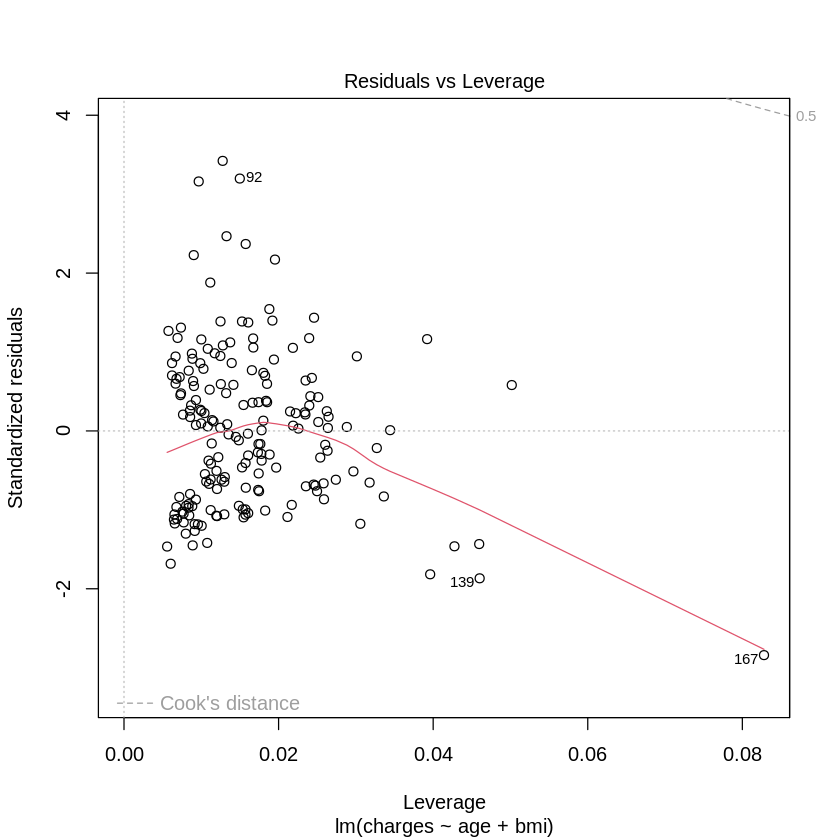

In [65]:
plot(model2)

In [70]:
model3 <- lm(charges ~ age + bmi + region, data = smokers)

In [71]:
model3


Call:
lm(formula = charges ~ age + bmi + region, data = smokers)

Coefficients:
    (Intercept)              age              bmi  regionnorthwest  
       -23129.5            266.8           1481.1          -1126.5  
regionsoutheast  regionsouthwest  
        -1249.4           -690.3  


In [74]:
summary(model3)


Call:
lm(formula = charges ~ age + bmi + region, data = smokers)

Residuals:
     Min       1Q   Median       3Q      Max 
-14866.4  -4754.9    385.5   3554.6  19328.9 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -23129.54    2512.86  -9.204   <2e-16 ***
age                266.76      32.12   8.304    4e-14 ***
bmi               1481.13      74.02  20.010   <2e-16 ***
regionnorthwest  -1126.51    1259.70  -0.894    0.373    
regionsoutheast  -1249.37    1260.96  -0.991    0.323    
regionsouthwest   -690.30    1305.32  -0.529    0.598    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5760 on 160 degrees of freedom
  (52 observations deleted due to missingness)
Multiple R-squared:  0.7676,	Adjusted R-squared:  0.7604 
F-statistic: 105.7 on 5 and 160 DF,  p-value: < 2.2e-16
